In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# 1 . One-Way ANOVA¶

Load tha dataset

In [2]:
one_anova = pd.read_csv(r"D:\downloads\retail_oneway_anova_dataset.csv")
one_anova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_size
0,7,1284.466734,725,506,20568.040633,11,Medium
1,15,1435.965854,1324,509,23637.098858,18,Medium
2,11,1593.272270,2765,500,11176.428748,33,Large
3,8,1942.606865,1436,537,28693.108672,23,Small
4,7,1757.297887,2806,468,17844.150571,23,Medium
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Medium
496,7,1549.935662,2838,498,20665.482229,32,Large
497,13,1647.735379,2463,500,23683.745244,29,Small
498,4,1586.750593,2649,528,20061.609082,20,Medium


Data Processing

In [3]:
one_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_size              0
dtype: int64

In [4]:
one_anova.duplicated().sum()

0

In [5]:
one_anova.shape

(500, 7)

In [6]:
one_anova.describe()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.616000,1500.033666,1761.688000,499.588000,22442.763482,27.006000
std,5.662922,299.278880,713.102689,21.834003,5137.782731,12.525324
min,1.000000,690.934007,501.000000,438.000000,7492.381587,5.000000
25%,4.750000,1288.959528,1185.500000,483.000000,19378.585124,17.000000
50%,9.000000,1494.370598,1765.500000,500.000000,22570.226365,26.000000
75%,15.000000,1692.086499,2425.000000,515.000000,25626.600346,37.000000
max,19.000000,2423.664243,2977.000000,565.000000,38302.455403,49.000000


EDA ( Exploratory Data Analysis)

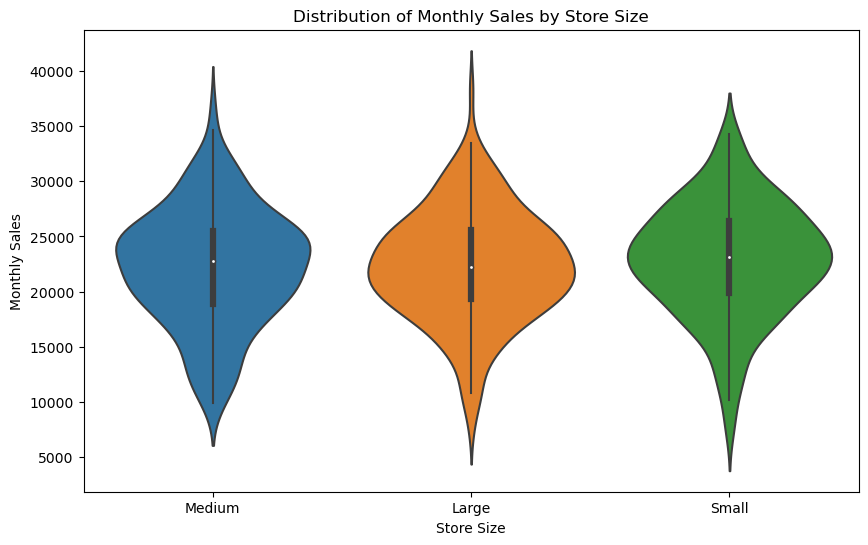

In [7]:
# Violin plot to show the distribution of sales within each store size
plt.figure(figsize=(10, 6))
sns.violinplot(x='store_size', y='monthly_sales', data=one_anova)
plt.title('Distribution of Monthly Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Monthly Sales')
plt.show()

H0 no significant diffrence in means among the gender in terms of Age 
H1 at least one dishes has a diffrent mean in terams of age

In [8]:
# Separate the sales data by store size
large_size = one_anova[one_anova["store_size"]=="Large"]["monthly_sales"]
medium_size = one_anova[one_anova["store_size"]=="Medium"]["monthly_sales"]
small_size = one_anova[one_anova["store_size"]=="Small"]["monthly_sales"]

# perform one way anova
f_stats,p_value= stats.f_oneway(large_size,medium_size,small_size)

# print the result 
print("\nAnova Result:")
print(f"f-stats:",f_stats)
print("p-value:",p_value)

# Define alpha
alpha = 0.05

# determine if we rejected null hypothesis
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in monthly sales among stores of different sizes.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in monthly sales among stores of different sizes.")
    


Anova Result:
f-stats: 0.6813172566840775
p-value: 0.5064219975629329
We fail to reject the null hypothesis. There is no significant difference in monthly sales among stores of different sizes.


One-Way ANOVA on Monthly Sales by Store Size:

A violin plot showed the distribution of monthly sales by store size (Large, Medium, Small). The ANOVA test resulted in 𝑓 f-statistics and 𝑝 p-value, leading to the conclusion that there is a significant difference in monthly sales among different store sizes (since 𝑝 < 0.05 p<0.05).

# 2. Two-Way ANOVA

Load tha dataset

In [9]:
two_anova = pd.read_csv(r"D:\downloads\retail_twoway_anova_dataset.csv")
two_anova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_size,store_location
0,7,1284.466734,725,506,20568.040633,11,Medium,Urban
1,15,1435.965854,1324,509,23637.098858,18,Medium,Urban
2,11,1593.272270,2765,500,11176.428748,33,Large,Urban
3,8,1942.606865,1436,537,28693.108672,23,Small,Urban
4,7,1757.297887,2806,468,17844.150571,23,Medium,Rural
...,...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Medium,Rural
496,7,1549.935662,2838,498,20665.482229,32,Large,Urban
497,13,1647.735379,2463,500,23683.745244,29,Small,Rural
498,4,1586.750593,2649,528,20061.609082,20,Medium,Rural


Data Processing

In [10]:
two_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_size              0
store_location          0
dtype: int64

In [11]:
two_anova.duplicated().sum()

0

In [12]:
two_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_size            500 non-null    object 
 7   store_location        500 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.4+ KB


EDA Exploratory Data Analysis

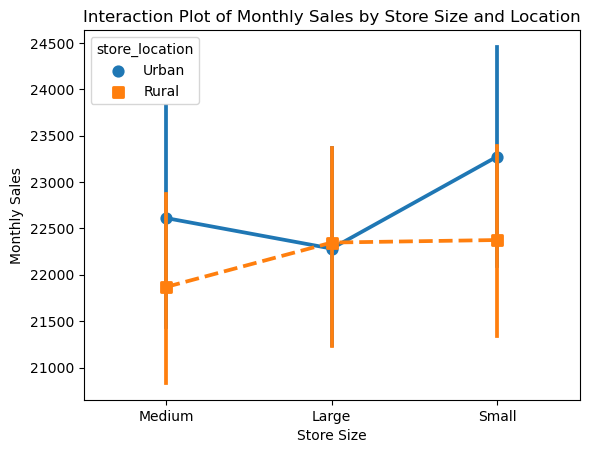

In [13]:
sns.pointplot(x='store_size', y='monthly_sales', hue='store_location', data=two_anova, markers=["o", "s", "D"], linestyles=["-", "--", "-."])
plt.title('Interaction Plot of Monthly Sales by Store Size and Location')
plt.xlabel('Store Size')
plt.ylabel('Monthly Sales')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3436\579230648.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="store_size", y='monthly_sales', data =two_anova, jitter=True, palette=palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3436\579230648.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.stripplot(x="store_size", y='monthly_sales', data =two_anova, jitter=True, palette=palette)


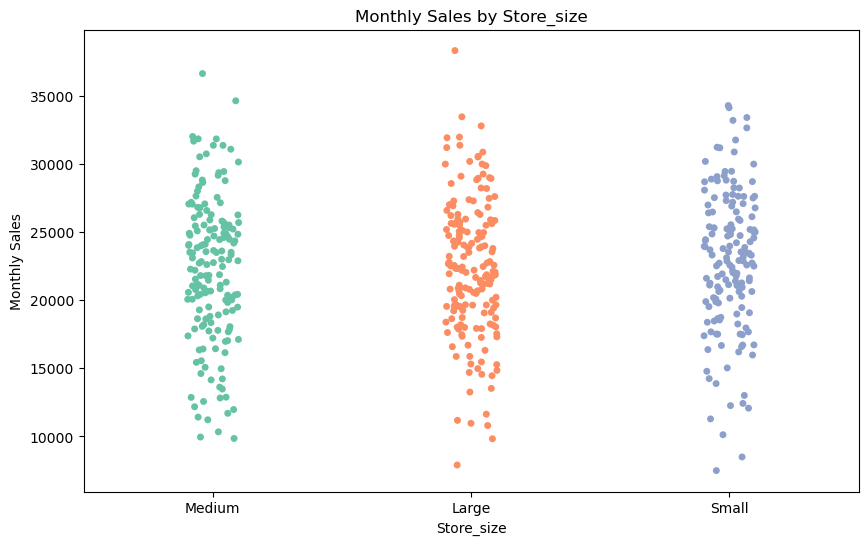

In [28]:
palette = sns.color_palette("Set2")
# Strip plot for `monthly_sales` by `quarter`
plt.figure(figsize=(10, 6))
sns.stripplot(x="store_size", y='monthly_sales', data =two_anova, jitter=True, palette=palette)
plt.title('Monthly Sales by Store_size')
plt.xlabel('Store_size')
plt.ylabel('Monthly Sales')
plt.show()


In [15]:
formula='monthly_sales ~ C(store_size) * C(store_location)'
model=ols(formula,data=two_anova).fit()
anova_table=anova_lm(model,typ=2)

#print anova table
print("ANOVA Table for two_way ANOVA:\n",anova_table)


# Print the ANOVA table for inspection
print(anova_table)

# Check for NaN values in the ANOVA table
print("NaN Values in ANOVA Table:\n", anova_table.isnull().any())

# Access the interaction p-value from the ANOVA table
interaction_p_value = anova_table.loc['C(store_size):C(store_location)', 'PR(>F)']
alpha = 0.05

# Print the interaction effect conclusion based on the p-value
if interaction_p_value < alpha:
    print("There is a significant interaction effect between store size and location on monthly sales.")
else:
    print("There is not enough evidence to suggest a significant interaction effect between store size and location on monthly sales.")

ANOVA Table for two_way ANOVA:
                                        sum_sq     df         F    PR(>F)
C(store_size)                    3.279510e+07    2.0  0.619231  0.538775
C(store_location)                3.202078e+07    1.0  1.209222  0.272022
C(store_size):C(store_location)  2.261387e+07    2.0  0.426991  0.652710
Residual                         1.308136e+10  494.0       NaN       NaN
                                       sum_sq     df         F    PR(>F)
C(store_size)                    3.279510e+07    2.0  0.619231  0.538775
C(store_location)                3.202078e+07    1.0  1.209222  0.272022
C(store_size):C(store_location)  2.261387e+07    2.0  0.426991  0.652710
Residual                         1.308136e+10  494.0       NaN       NaN
NaN Values in ANOVA Table:
 sum_sq    False
df        False
F          True
PR(>F)     True
dtype: bool
There is not enough evidence to suggest a significant interaction effect between store size and location on monthly sales.


# 3 . Repeated Measures ANOVA

Load tha dataset

In [16]:
repeated_anova = pd.read_csv(r"D:\downloads\retail_repeated_measures_anova_dataset.csv")
repeated_anova

,store_id,store_area,items_available,daily_customer_count,quarter_1_sales,quarter_2_sales,quarter_3_sales,quarter_4_sales,num_employees
0,7,1284.466734,725,506,19568.040633,27220.955444,24511.556526,28579.926780,17
1,15,1435.965854,1324,509,22637.098858,37609.484487,26764.136069,27746.829711,45
2,11,1593.272270,2765,500,10176.428748,20191.200558,21016.275105,27048.667839,19
3,8,1942.606865,1436,537,27693.108672,28076.607873,21671.121518,32295.477605,46
4,7,1757.297887,2806,468,16844.150571,20370.443436,23014.052578,16055.263585,11
...,...,...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,29127.336710,17080.335584,16154.317313,28720.030713,9
496,7,1549.935662,2838,498,19665.482229,20640.898484,19555.838028,21688.237381,30
497,13,1647.735379,2463,500,22683.745244,19000.855617,23713.741680,26057.241638,15
498,4,1586.750593,2649,528,19061.609082,16168.810531,21056.417545,17143.165659,11


Data Processing

In [17]:
repeated_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
quarter_1_sales         0
quarter_2_sales         0
quarter_3_sales         0
quarter_4_sales         0
num_employees           0
dtype: int64

In [18]:
repeated_anova.duplicated().sum()

0

In [19]:
import scipy.stats as stats

# Reshape the data from wide to long format
long_data = pd.melt(repeated_anova, id_vars=['store_id'], 
                    value_vars=['quarter_1_sales', 'quarter_2_sales', 'quarter_3_sales', 'quarter_4_sales'],
                    var_name='quarter', value_name='monthly_sales')

# Display the reshaped data
print(long_data.head(),'\n')

# Perform one-way ANOVA
anova_result = stats.f_oneway(
    long_data[long_data['quarter'] == 'quarter_1_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_2_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_3_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_4_sales']['monthly_sales']
)

# Print the ANOVA result
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue,'\n')

# Set significance level
alpha = 0.05

# Make a decision based on the p-value
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in monthly sales across different quarters.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in monthly sales across different quarters.")

   store_id          quarter  monthly_sales
0         7  quarter_1_sales   19568.040633
1        15  quarter_1_sales   22637.098858
2        11  quarter_1_sales   10176.428748
3         8  quarter_1_sales   27693.108672
4         7  quarter_1_sales   16844.150571 

F-statistic: 29.872276781268386
p-value: 6.881545087670228e-19 

Reject the null hypothesis. There is a significant difference in monthly sales across different quarters.


EDA Exploratory Data Analysis

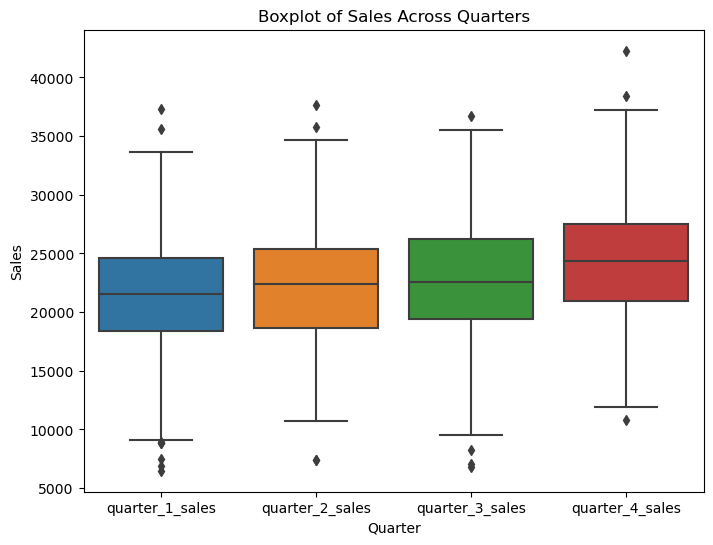

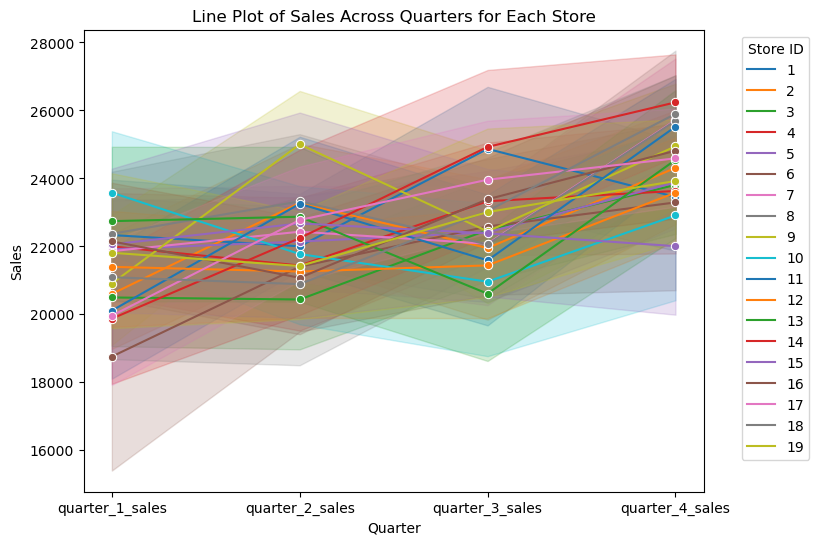

In [20]:
sales_data = repeated_anova.melt(id_vars=['store_id'], 
                                 value_vars=['quarter_1_sales', 'quarter_2_sales', 'quarter_3_sales', 'quarter_4_sales'],
                                 var_name='Quarter', value_name='Sales')

# Box plot of sales across quarters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Quarter', y='Sales', data=sales_data)
plt.title('Boxplot of Sales Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

# Line plot of sales across quarters for each store
plt.figure(figsize=(8, 6))
sns.lineplot(x='Quarter', y='Sales', hue='store_id', marker='o', data=sales_data, palette='tab10')
plt.title('Line Plot of Sales Across Quarters for Each Store')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Store ID')
plt.show()


# 4. MANOVA

Load tha dataset

In [22]:
m_anova = pd.read_csv(r"D:\downloads\retail_manova_dataset.csv")
m_anova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_type
0,7,1284.466734,725,506,20568.040633,11,Corporate
1,15,1435.965854,1324,509,23637.098858,18,Corporate
2,11,1593.272270,2765,500,11176.428748,33,Independent
3,8,1942.606865,1436,537,28693.108672,23,Franchise
4,7,1757.297887,2806,468,17844.150571,23,Corporate
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Corporate
496,7,1549.935662,2838,498,20665.482229,32,Independent
497,13,1647.735379,2463,500,23683.745244,29,Franchise
498,4,1586.750593,2649,528,20061.609082,20,Corporate


In [23]:
m_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_type              0
dtype: int64

In [24]:
m_anova.duplicated().sum()

0

EDA Exploratory Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


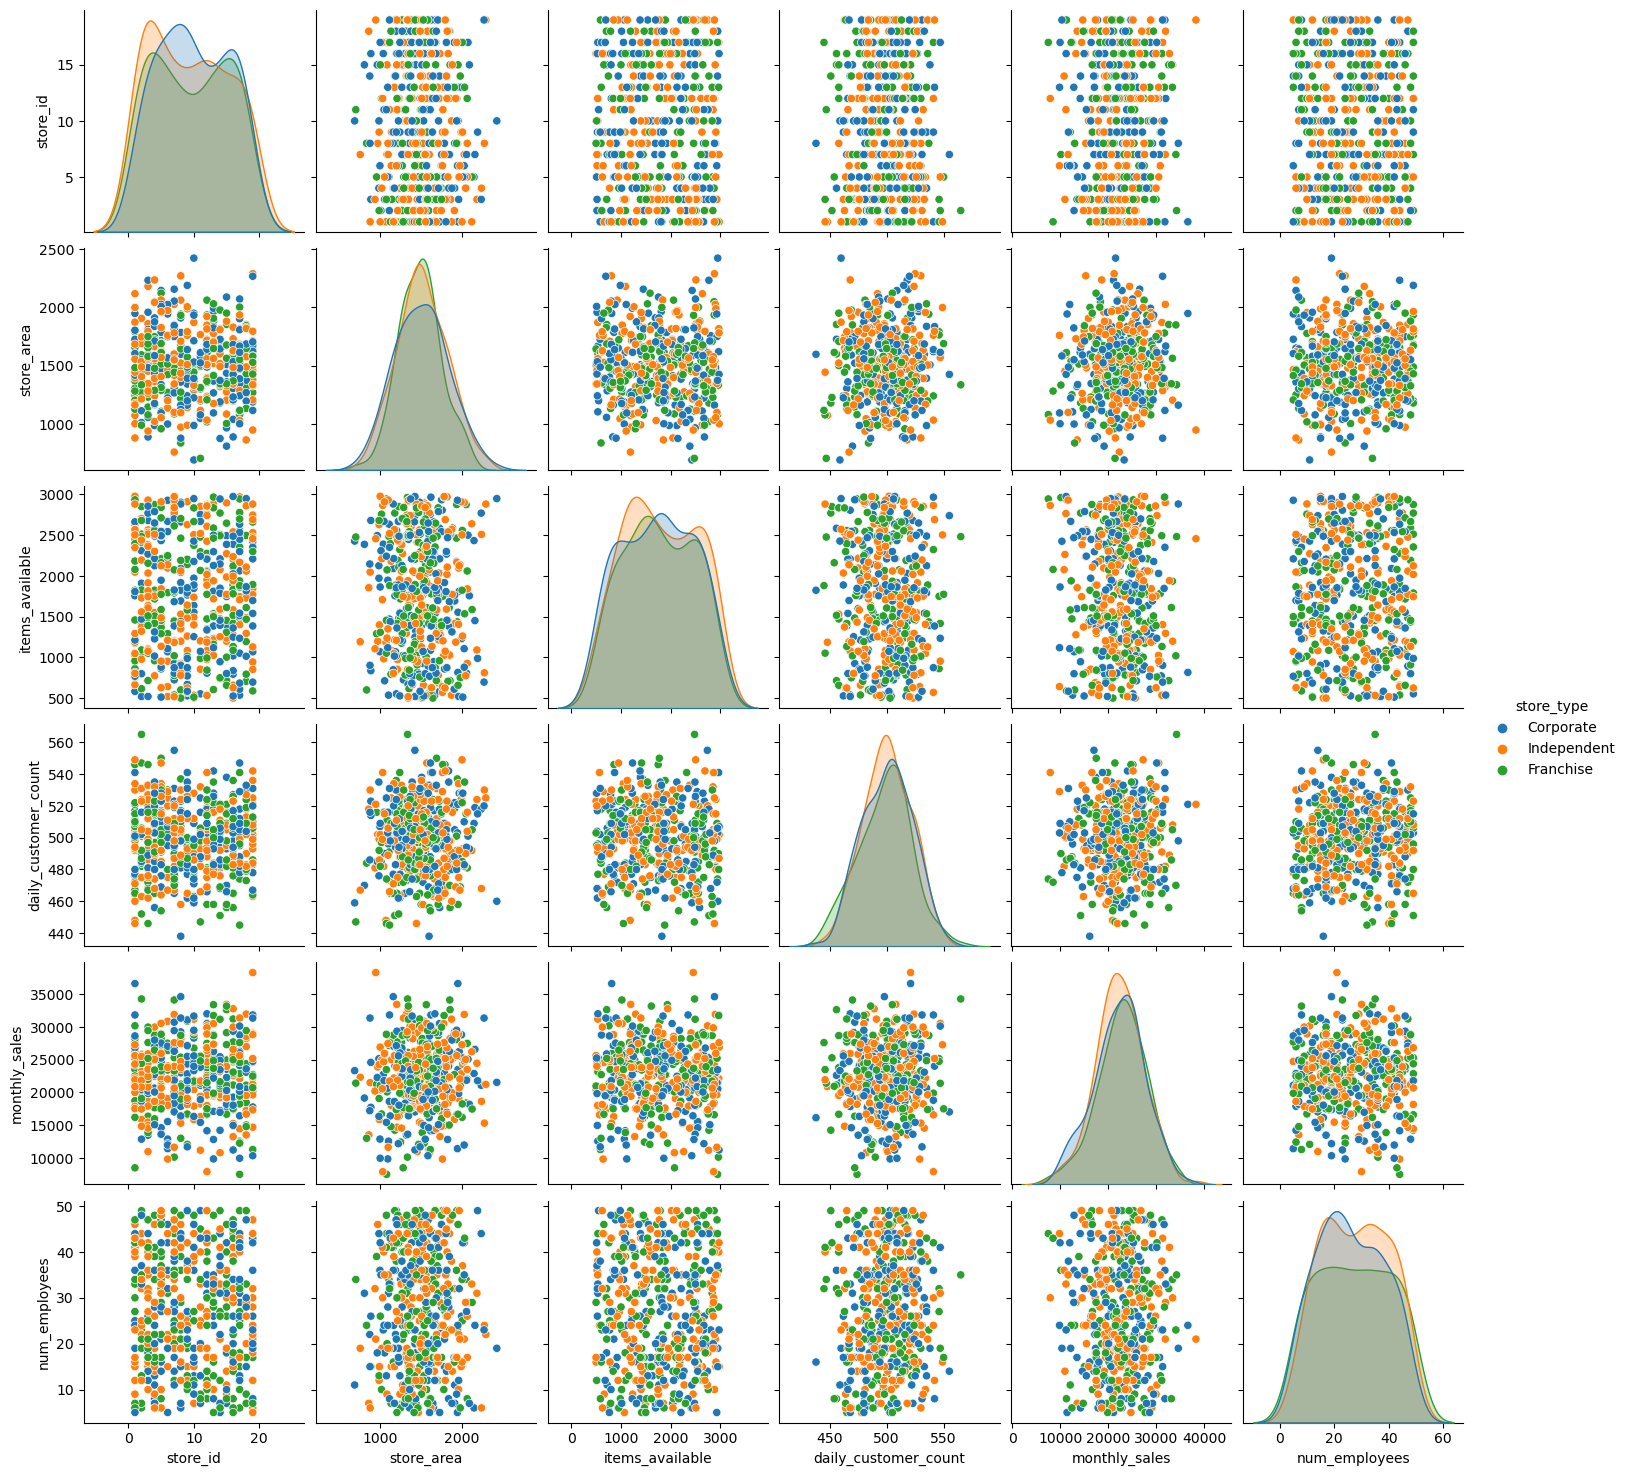

In [25]:
# Pairplot to visualize the distribution and relationships
sns.pairplot(m_anova, hue="store_type")
plt.show()

In [26]:
from statsmodels.multivariate.manova import MANOVA

# Define the dependent variables and the independent variable
dependent_vars = 'monthly_sales + daily_customer_count + items_available'
independent_var = 'store_type'

# Fit the MANOVA model
manova = MANOVA.from_formula(f'{dependent_vars} ~ {independent_var}', data=m_anova)
manova_results = manova.mv_test()

# Print the MANOVA results
print(manova_results)

# Extract the p-values from the MANOVA results
p_values = manova_results.results['store_type']['stat']['Pr > F']

# Set significance level
alpha = 0.05

# Make a decision based on the p-values
if all(p < alpha for p in p_values):
    print("Reject the null hypothesis. There is a significant difference in store performance metrics among different store types.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in store performance metrics among different store types.")

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0053 3.0000 495.0000 30797.6579 0.0000
         Pillai's trace   0.9947 3.0000 495.0000 30797.6579 0.0000
 Hotelling-Lawley trace 186.6525 3.0000 495.0000 30797.6579 0.0000
    Roy's greatest root 186.6525 3.0000 495.0000 30797.6579 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
        store_type        Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.9936  6.0000  990.0000   0.5270  0.7881
          Pi

EDA Exploratory Data Analysis

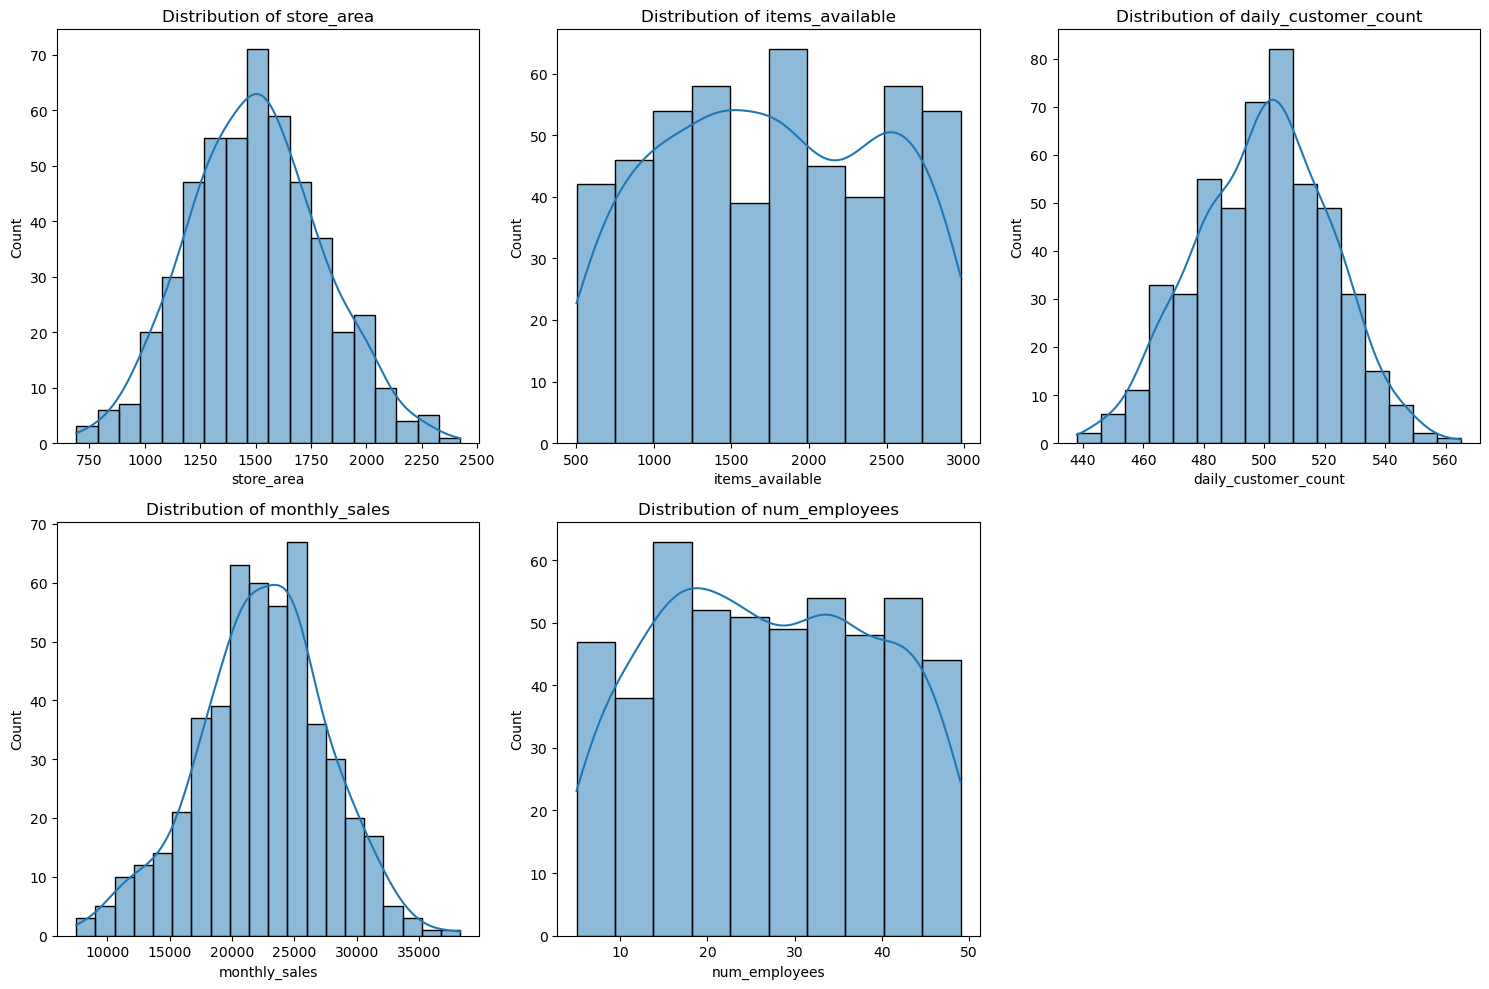

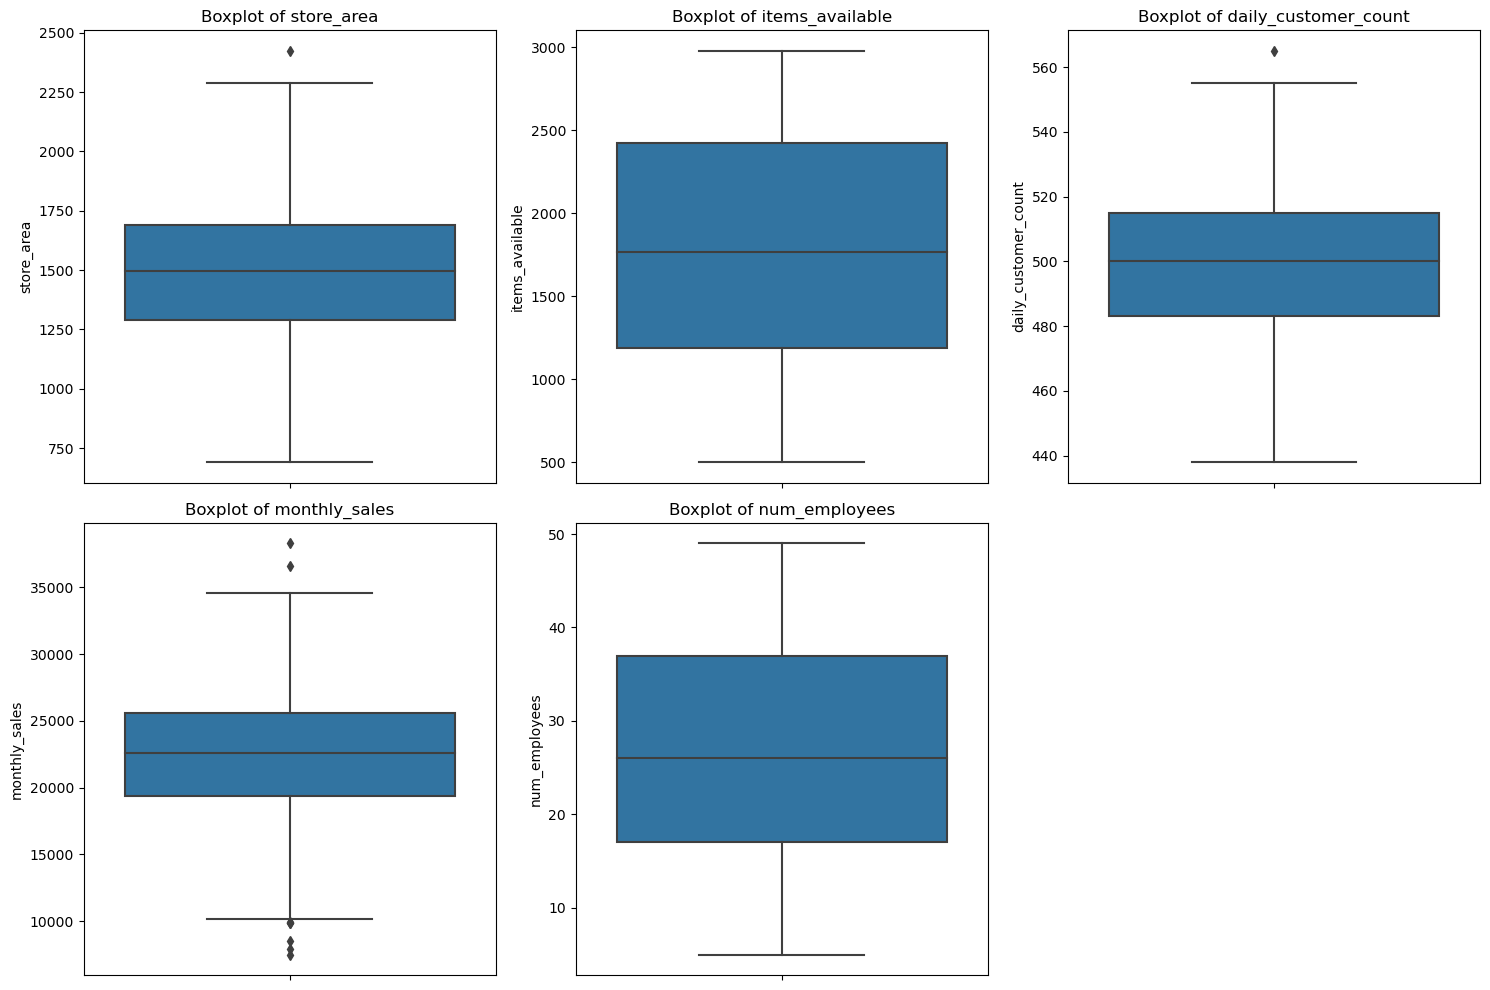

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


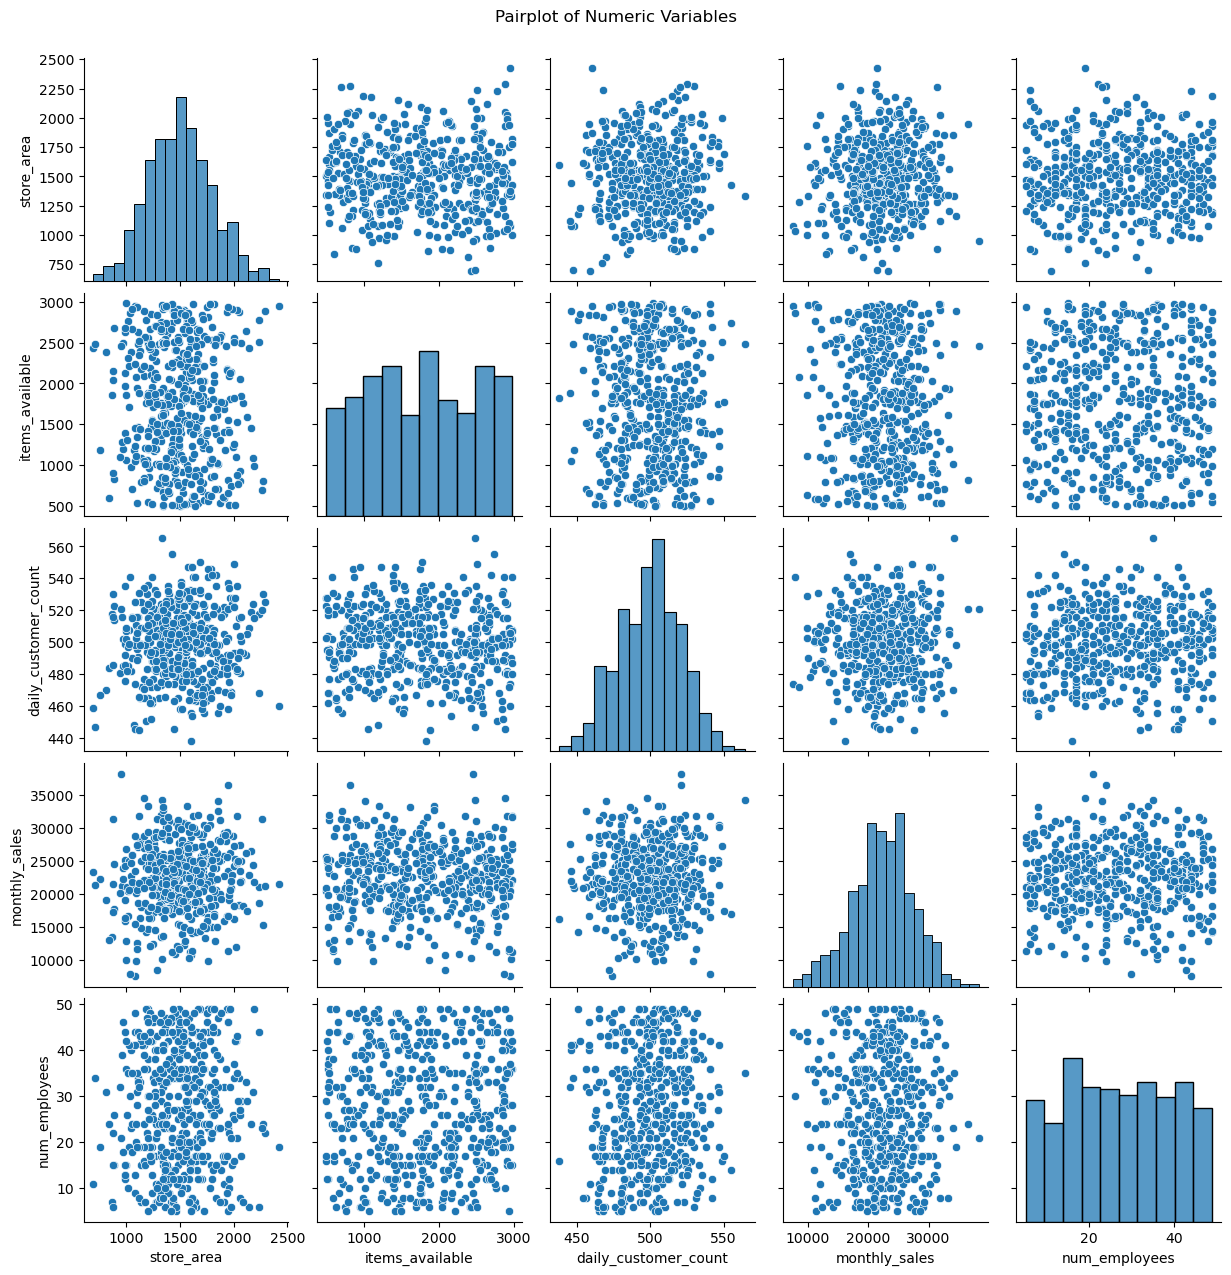

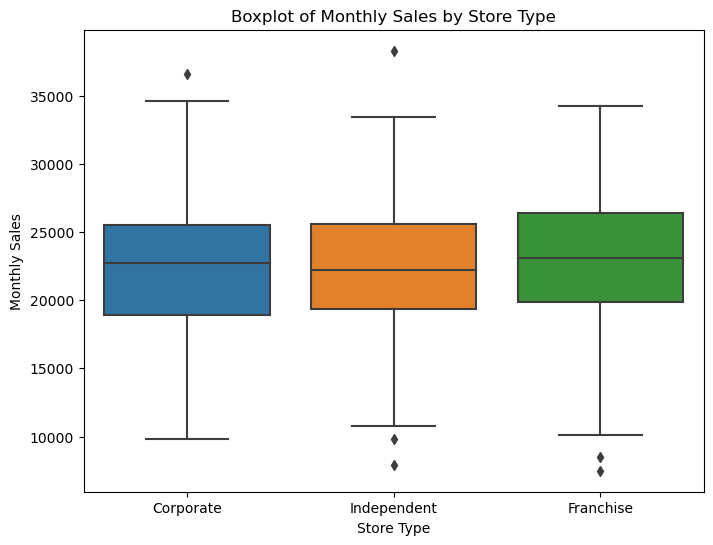

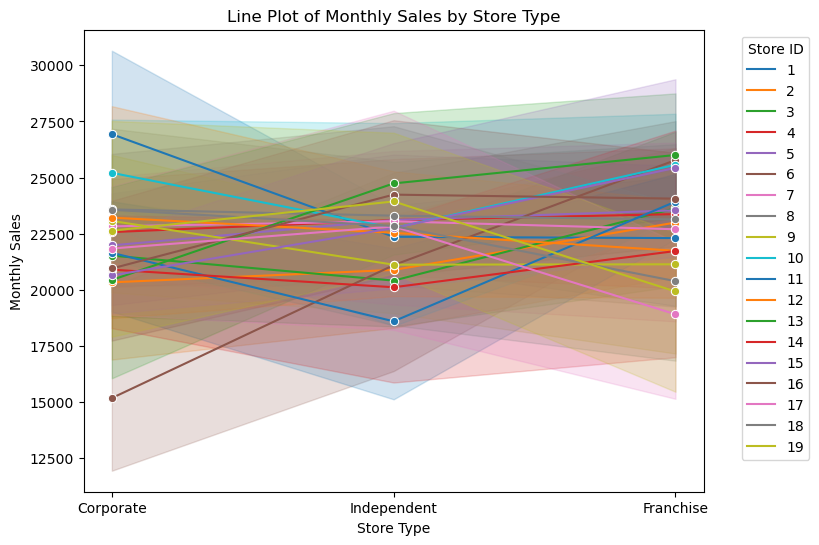

In [27]:
# Visualize the distribution of numeric variables
numeric_columns = ['store_area', 'items_available', 'daily_customer_count', 'monthly_sales', 'num_employees']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(m_anova[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plot of numeric variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=m_anova[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between numeric variables
sns.pairplot(m_anova[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Box plot of monthly sales by store type
plt.figure(figsize=(8, 6))
sns.boxplot(x='store_type', y='monthly_sales', data=m_anova)
plt.title('Boxplot of Monthly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Monthly Sales')
plt.show()

# Line plot of monthly sales by store type
plt.figure(figsize=(8, 6))
sns.lineplot(x='store_type', y='monthly_sales', hue='store_id', marker='o', data =m_anova, palette='tab10')
plt.title('Line Plot of Monthly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Monthly Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Store ID')
plt.show()